In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import params as my
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
%config InlineBackend.figure_format = 'svg'

In [45]:
data = pd.read_csv('data.csv')

In [46]:
vtx = data['# vtx with two tracks of opposite curvature'].to_numpy()
x = data['XV (cm)'].to_numpy()
y = data['YV(cm)'].to_numpy()
z = data['ZV(cm)'].to_numpy()
px1 = data['Track1 PX(MeV) '].to_numpy()
py1 = data['Track1 PY(MeV) '].to_numpy()
pz1 = data['Track1 PZ(MeV) '].to_numpy()
px2 = data['Track2 PX(MeV) '].to_numpy()
py2 = data['Track2 PY(MeV) '].to_numpy()
pz2 = data['Track2 PZ(MeV) '].to_numpy()

In [47]:
N_phi = my.luminosity * my.sigma_ee_phi
N_KLKS = N_phi * my.BR_phi_KK
print(f"Number of produced KL/KS pairs = {int(N_KLKS)}")

N_KL_CP = N_KLKS * my.BR_KL_2pi
print(f"Expected CP violating KL = {int(N_KL_CP)}")

print(f"BR = {N_KL_CP/N_KLKS}")

N_KL_CP_measured = N_KL_CP * my.acceptance * my.epsL
print(f"\nDetected CP violating KL = {int(N_KL_CP_measured)}")

N_KS_measured = N_KLKS * my.BR_KS_2pi * my.epsS
print(f"Detected KS = {int(N_KS_measured)}")

print(f"\nNumber of events in data : {len(np.where(vtx == 1)[0])}")

Number of produced KL/KS pairs = 204000
Expected CP violating KL = 408
BR = 0.002

Detected CP violating KL = 51
Detected KS = 98532

Number of events in data : 200743


In [48]:
# Define some useful quantities
radius = np.sqrt(x*x + y*y + z*z)

mass_array = np.repeat(my.m_pi, len(data))
E1 = my.getE(mass_array, px1, py1, pz1)
E2 = my.getE(mass_array, px2, py2, pz2)
inv_mass = my.invmass(E1+E2, px1+px2, py1+py2, pz1+pz2)

p_array = np.repeat(my.p_K0, len(data))
p_tot = my.norm(px1+px2, py1+py2, pz1+pz2)

mass_K_array = np.repeat(my.m_K0, len(data))
pKx, pKy, pKz = my.getComponents(p_array, x, y, z)
E_K = my.getE(mass_K_array, pKx, pKy, pKz)

delta_px = pKx - px1 - px2
delta_py = pKy - py1 - py2
delta_pz = pKz - pz1 - pz2

missing_p = my.norm(pKx-px1-px2, pKy-py1-py2, pKz-pz1-pz2)
M2 = (E_K - E1 -E2)**2 - missing_p**2

angle_K_pi = my.angle_of_vectors(pKx, pKy, pKz, px1+px2, py1+py2, pz1+pz2)

In [49]:
# Define cuts

cut_r = (radius >= 10)
cut_r_inv = np.invert(cut_r)
cut_FV = (z > -my.zlim) & (z < my.zlim) & (np.sqrt(x*x+y*y) > my.xmin) & (np.sqrt(x*x+y*y) < my.xmax)
cut_m = (inv_mass > my.m_K0 - 8) & (inv_mass < my.m_K0 + 8)
cut_p = (p_tot > my.p_K0 - 20) & (p_tot < my.p_K0 + 20)

cut_M2 = (M2 > -100) & (M2 < 100)
cut_pxpypz = (delta_px > -15) & (delta_px < 15) & (delta_py > -15) & (delta_py < 15) & (delta_pz > -15) & (delta_pz < 15)
cut_angle = (0.990 <= np.cos(np.radians(angle_K_pi))) & (np.cos(np.radians(angle_K_pi)) <= 1)

(130.6, 90.6)

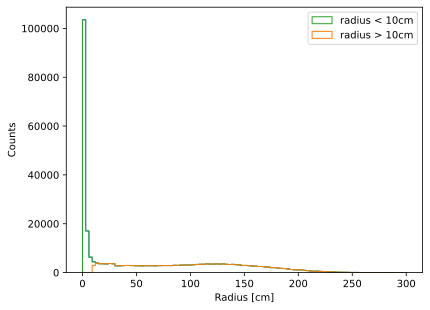

In [52]:
nbins = 100
lims = (0, 300)

plt.hist(radius, bins = nbins, range = lims, histtype = 'step')

# plt.hist([radius[cut_FV], radius[cut_FV == False]], 
#          bins = nbins, range = lims, histtype = 'step',
#          label = ['cut_FV','not FV'], stacked = True)

plt.hist([radius[cut_r], radius[cut_r == False]], 
         bins = nbins, range = lims, histtype = 'step',
         label = ['radius > 10cm','radius < 10cm'], stacked = True)

# plt.ylim(0, 15000)
plt.xlabel('Radius [cm]')
plt.ylabel('Counts')
plt.legend();
plt.savefig('radius.jpg', dpi = 300)

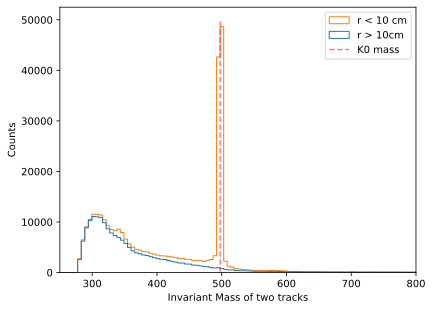

In [53]:
lims = (250, 800)

nbins = 100

plt.hist([inv_mass[cut_r], inv_mass[(cut_r) == False]], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['r > 10cm', 'r < 10 cm'], stacked = True)

plt.vlines(my.m_K0, 0, 50000, 'r', linestyle = 'dashed', label = 'K0 mass', alpha = 0.5)
plt.xlim(lims)
plt.xlabel('Invariant Mass of two tracks')
plt.ylabel('Counts')
plt.legend();
plt.savefig('Inv_mass.jpg', dpi = 300)

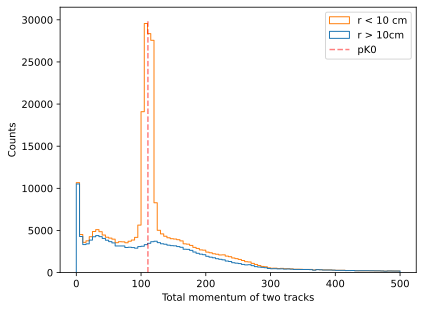

In [54]:
bins = 100
lims = (0,500)

plt.hist([p_tot[cut_r], p_tot[(cut_r) == False]], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['r > 10cm', 'r < 10 cm'], stacked = True)

plt.vlines(my.p_K0, 0, 30000, 'r', linestyle = 'dashed', label = 'pK0', alpha = 0.5)
plt.xlabel('Total momentum of two tracks')
plt.ylabel('Counts')
plt.legend();
plt.savefig('momentum.jpg', dpi = 300)

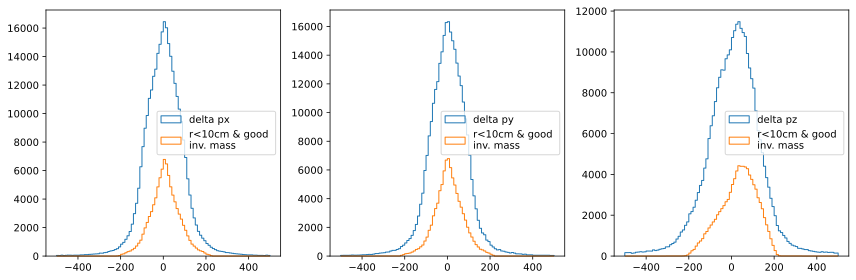

In [11]:
plt.figure(figsize = (12,4))

bins = 100
lims = (-500,500)

plt.subplot(131)


plt.hist(delta_px, histtype = 'step', bins = bins, range = lims,label = 'delta px')
plt.hist(delta_px[cut_r_inv & cut_m], histtype = 'step', bins = bins, range = lims, label = 'r<10cm & good \ninv. mass')
plt.legend()

plt.subplot(132)


plt.hist(delta_py, histtype = 'step', bins = bins, range = lims,label = 'delta py')
plt.hist(delta_py[cut_r_inv & cut_m], histtype = 'step', bins = bins, range = lims, label = 'r<10cm & good \ninv. mass')
plt.legend()

plt.subplot(133)

plt.hist(delta_pz, histtype = 'step', bins = bins, range = lims, label = 'delta pz')
plt.hist(delta_pz[cut_r_inv & cut_m], histtype = 'step', bins = bins, range = lims, label = 'r<10cm & good \ninv. mass')

plt.legend()

plt.tight_layout();

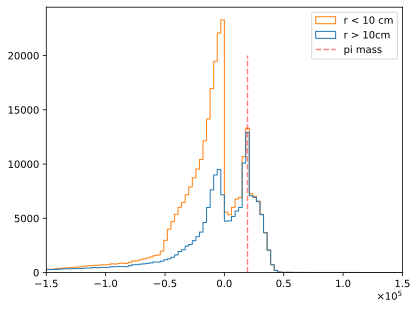

In [12]:
lims = (-150000,150000)
bins = 100
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3), useMathText = True)


plt.hist([M2[cut_r], M2[(cut_r) == False]], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['r > 10cm', 'r < 10 cm'], stacked = True)

plt.vlines(my.m_pi**2, 0, 20000, 'r', linestyle = 'dashed', label = 'pi mass', alpha = 0.5)
plt.legend()
plt.xlim(lims);

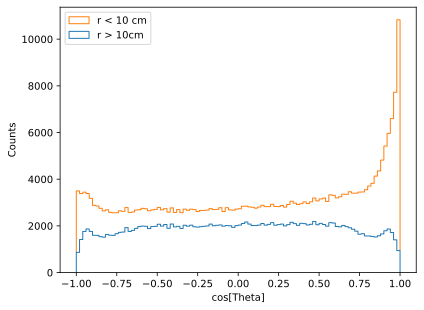

In [13]:
theta = my.getTheta(x,y,z)
bins = 100
lims = (-1,1)

plt.hist([np.cos(theta[cut_r]), np.cos(theta[(cut_r) == False])], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['r > 10cm', 'r < 10 cm'], stacked = True);

plt.xlabel('cos[Theta]')
plt.ylabel('Counts')
plt.legend()
plt.show()

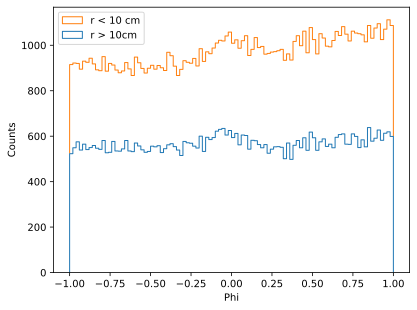

In [14]:
phi = my.getPhi(x,y,z)

bins = 50

plt.hist([phi[cut_r], phi[(cut_r) == False]], 
         histtype = 'step', bins = nbins, range = lims, 
         label = ['r > 10cm', 'r < 10 cm'], stacked = True);

plt.xlabel('Phi')
plt.ylabel('Counts')
plt.legend()
plt.show()

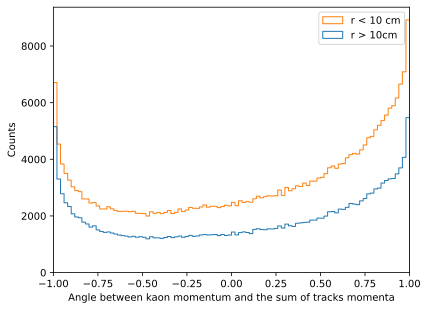

In [73]:
bins = 100
lims = (-1,1)

plt.hist([np.cos(np.radians(angle_K_pi[cut_r])), np.cos(np.radians(angle_K_pi[(cut_r) == False]))], 
         histtype = 'step', bins = bins, range = lims,
         label = ['r > 10cm', 'r < 10 cm'], stacked = True);

# plt.hist(np.cos(np.radians(angle_K_pi[(cut_r==False) & cut_m ])), 
#          histtype = 'step', bins = bins, range = lims,
#          label =  'r < 10 cm')

# plt.hist(np.cos(np.radians(angle_K_pi[cut_r & cut_m])), 
#          histtype = 'step', bins = bins, range = lims,
#          label =  'r>10cm')

plt.xlabel('Angle between kaon momentum and the sum of tracks momenta')
plt.ylabel('Counts')
plt.xlim(lims)
plt.legend()
plt.savefig('Angle.jpg', dpi = 300)
plt.show()


# Event Display

In [105]:
# 0 for KS -> 2pi event
# 259681:259683 for KS-KL decay near IP
# 259315: 259317
# 17233 KL->2pi event
# 54026:54028 KL->2pi KS->2pi event

sliced = data.iloc[54026:54028]
sliced

#  # vtx with two tracks of opposite curvature    XV (cm)   
54026  54026                                            1  73.088081  \
54027  54027                                            2   0.114014   

           YV(cm)    ZV(cm)  Track1 PX(MeV)   Track1 PY(MeV)    
54026 -126.094719 -1.711717      -139.449814       -62.207191  \
54027   -0.021364  1.158172      -164.974686       -53.081799   

       Track1 PZ(MeV)   Track2 PX(MeV)   Track2 PY(MeV)   Track2 PZ(MeV)   
54026       119.640877       194.446457       -30.986448      -124.246132  
54027      -125.345108        94.644524       147.049469       125.921745

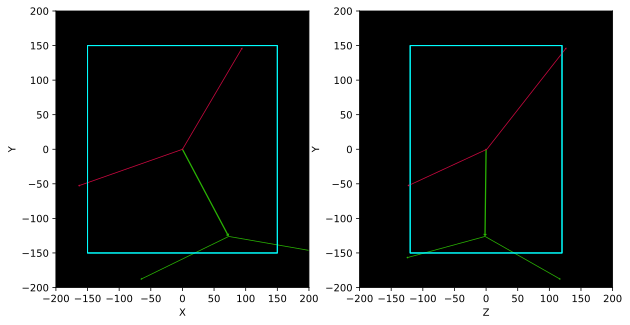

In [112]:
N = sliced['#'].values

from matplotlib.patches import Rectangle

event = N
fig, ax = plt.subplots(1, 2,figsize=(10, 5))

j = 70
for i in event:
    col = (np.random.random(), np.random.random(), np.random.random())
    
    V = [x[i],y[i]]
    origin = [0,0] # origin point

    ax[0].quiver(*origin, V[0], V[1], color = col, angles='xy', scale_units='xy', scale=1,
               headlength = 2, headaxislength = 2, width = 0.005, ls = '--')
    
    track1 = [px1[i],py1[i]]
    ax[0].quiver(*V, track1[0], track1[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    
    track2 = [px2[i],py2[i]]
    ax[0].quiver(*V, track2[0], track2[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)

    ax[0].add_patch(Rectangle((-150, -150), 300, 300,
             edgecolor = 'cyan',
             facecolor = 'blue',
             fill=False,
             lw=1))
    
    V = [z[i],y[i]]
    origin = [0,0] # origin point

    ax[1].quiver(*origin, V[0], V[1], color = col , angles='xy', scale_units='xy', scale=1,
               headlength = 2, headaxislength = 2, width = 0.005, ls = '--')
    
    track1 = [pz1[i],py1[i]]
    ax[1].quiver(*V, track1[0], track1[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    track2 = [pz2[i],py2[i]]
    ax[1].quiver(*V, track2[0], track2[1], color=col, angles='xy', scale_units='xy', 
               scale=1, headlength = 2, headaxislength = 2, width = 0.003)
    
    ax[1].add_patch(Rectangle((-120, -150), 240, 300,
         edgecolor = 'cyan',
         facecolor = 'blue',
         fill=False,
         lw=1))
    j = 1
    

ax[0].set_xlim([-200, 200])
ax[0].set_xlabel('X')
ax[0].set_ylim([-200, 200])
ax[0].set_ylabel('Y')
ax[1].set_xlim([-200, 200])
ax[1].set_ylim([-200, 200])
ax[1].set_xlabel('Z')
ax[1].set_ylabel('Y')
ax[0].set_facecolor('black')
ax[1].set_facecolor('black')

plt.savefig('2pi.jpg', dpi = 300)

# Data Processing

In [18]:
vtx1 = vtx                                                                   # Auxiliary variable to eventually slice data

events = np.where(vtx1 == 1)[0]
ext_events = np.append(events,len(vtx1))                                     # extend array to avoid problems in for loop


tol = np.pi/10



KS_2pi = 0
KL_CP = 0

kl_cp_index = []
ks_2pi_index = []


for i, eve in enumerate(events):                                             # Loop through events
    
    event_length = ext_events[i+1]-ext_events[i]
    print(f'-> Event {i} Index {eve} Length {event_length}')
    
    if event_length == 1:
        if cut_FV[eve] & cut_m[eve] & cut_p[eve] & cut_angle[eve]:           # CP violating KL detected in FV
            KL_CP += 1
            kl_cp_index.append(eve)
            print('\tFound KL->2pi')
        elif cut_r_inv[eve] & cut_m[eve] & cut_p[eve]:                       # KS near IP so a KL must be somewhere                                         
                KS_2pi += 1
                ks_2pi_index.append(eve)
                print('\tKS->2pi')
    
    
    elif event_length > 1:                                                   # Case with more than 1 vertex
        
        BTB = 0
        
        for j in range(0, event_length):
            for k in range(j+1, event_length):
                
                if (-tol + np.pi < (theta[j+eve] + theta[k+eve]) < tol + np.pi):
                    if (np.pi-tol < abs(phi[k+eve] - phi[j+eve]) < np.pi+tol):
                        if (radius[k+eve] <= radius[j+eve]):
                            
                            BTB += 1
                            print(f'\t{k+eve} is a KS, {j+eve} is a KL')
                            
                            if cut_r_inv[k+eve] & cut_m[k+eve] & cut_p[k+eve]:
                                KS_2pi += 1
                                ks_2pi_index.append(k+eve)
                                print('\tKS -> 2pi')

                            if cut_FV[j+eve] & cut_m[j+eve] & cut_p[j+eve] & cut_angle[j+eve]:
                                KL_CP += 1
                                kl_cp_index.append(j+eve)
                                print(f'\tKL -> 2pi')
                                
                        elif (radius[k+eve] > radius[j+eve]):

                            BTB += 1
                            print(f'\t{j+eve} is a KS, {k+eve} is a KL')

                            if cut_r_inv[j+eve] & cut_m[j+eve] & cut_p[j+eve]:
                                KS_2pi += 1
                                ks_2pi_index.append(j+eve)
                                print('\tKS -> 2pi')
                            
                            if cut_FV[k+eve] & cut_m[k+eve] & cut_p[k+eve] & cut_angle[k+eve]:
                                kl_cp_index.append(k+eve)
                                KL_CP += 1
                                print(f'\tKL -> 2pi')
                else:
                    print(f'\tNo Kaon to Tag {j+eve}, {k+eve}')
        
        
        if BTB == 0:
            for j in range(0, event_length):
                if cut_r_inv[j+eve] & cut_m[j+eve] & cut_p[j+eve]:
                    KS_2pi += 1
                    ks_2pi_index.append(j+eve)
                    print('\tKS -> 2pi')
                    
                elif cut_FV[j+eve] & cut_m[j+eve] & cut_p[j+eve] & cut_angle[j+eve]: 
                    KL_CP += 1
                    kl_cp_index.append(j+eve)
                    print('\tFound KL->2pi')

-> Event 0 Index 0 Length 1
	KS->2pi
-> Event 1 Index 1 Length 1
	KS->2pi
-> Event 2 Index 2 Length 1
-> Event 3 Index 3 Length 1
	KS->2pi
-> Event 4 Index 4 Length 1
-> Event 5 Index 5 Length 1
-> Event 6 Index 6 Length 4
	No Kaon to Tag 6, 8
	6 is a KS, 9 is a KL
	No Kaon to Tag 7, 9
	No Kaon to Tag 8, 9
-> Event 7 Index 10 Length 1
	KS->2pi
-> Event 8 Index 11 Length 1
	KS->2pi
-> Event 9 Index 12 Length 2
	12 is a KS, 13 is a KL
	KS -> 2pi
-> Event 10 Index 14 Length 1
	KS->2pi
-> Event 11 Index 15 Length 3
	No Kaon to Tag 15, 16
	No Kaon to Tag 15, 17
	No Kaon to Tag 16, 17
-> Event 12 Index 18 Length 1
-> Event 13 Index 19 Length 2
	No Kaon to Tag 19, 20
	KS -> 2pi
-> Event 14 Index 21 Length 1
-> Event 15 Index 22 Length 2
	No Kaon to Tag 22, 23
-> Event 16 Index 24 Length 1
-> Event 17 Index 25 Length 1
-> Event 18 Index 26 Length 1
	KS->2pi
-> Event 19 Index 27 Length 1
-> Event 20 Index 28 Length 2
-> Event 21 Index 30 Length 1
	KS->2pi
-> Event 22 Index 31 Length 1
	KS->2pi


-> Event 16048 Index 25124 Length 1
	KS->2pi
-> Event 16049 Index 25125 Length 1
	KS->2pi
-> Event 16050 Index 25126 Length 2
	No Kaon to Tag 25126, 25127
	KS -> 2pi
-> Event 16051 Index 25128 Length 1
	KS->2pi
-> Event 16052 Index 25129 Length 1
-> Event 16053 Index 25130 Length 2
	No Kaon to Tag 25130, 25131
-> Event 16054 Index 25132 Length 2
	No Kaon to Tag 25132, 25133
-> Event 16055 Index 25134 Length 1
-> Event 16056 Index 25135 Length 1
	KS->2pi
-> Event 16057 Index 25136 Length 4
	No Kaon to Tag 25136, 25137
	No Kaon to Tag 25136, 25138
	No Kaon to Tag 25136, 25139
	No Kaon to Tag 25137, 25138
	No Kaon to Tag 25137, 25139
	No Kaon to Tag 25138, 25139
-> Event 16058 Index 25140 Length 1
	KS->2pi
-> Event 16059 Index 25141 Length 1
	KS->2pi
-> Event 16060 Index 25142 Length 1
-> Event 16061 Index 25143 Length 3
	No Kaon to Tag 25143, 25144
-> Event 16062 Index 25146 Length 1
	KS->2pi
-> Event 16063 Index 25147 Length 2
	No Kaon to Tag 25147, 25148
	KS -> 2pi
-> Event 16064 Index

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
ks = KS_2pi/(my.epsS*my.BR_KS_2pi)
int(ks), KS_2pi, N_KS_measured

(188068, 90837, 98532.0)

In [20]:
kl_cp = KL_CP/(my.acceptance*my.epsL)
kl_cp, KL_CP, N_KL_CP_measured

(432.0, 54, 51.00000000000001)

In [38]:
rel_sigma = np.sqrt((KL_CP/KL_CP**2))
sigma_cp = rel_sigma*kl_cp

In [39]:
rel_sigma_S = np.sqrt((KS_2pi/KS_2pi**2))
sigma_ks = rel_sigma_S*ks

In [42]:
BR = int(kl_cp)/(int(ks))
sigma_BR = np.sqrt((rel_sigma_S)**2 + (rel_sigma)**2) * BR

In [43]:
print(f'BR = {BR:.4f} +/- {sigma_BR:.4f}')

BR = 0.0023 +/- 0.0003


In [118]:
BR = kl_cp/N_KLKS
sigma_BR = np.sqrt((rel_sigma)**2) * BR
print(f'BR = {BR:.4f} +/- {sigma_BR:.4f}')

BR = 0.0021 +/- 0.0003


In [74]:
length = []
for i, eve in enumerate(events):                                             # Loop through events
    
    length.append(ext_events[i+1]-ext_events[i])

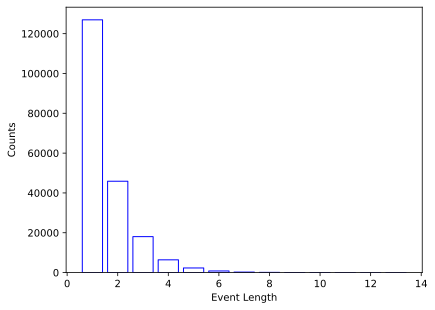

In [92]:
# plt.hist(length, histtype = 'step', align = 'left');
plt.bar(*np.unique(length, return_counts=True), fill = False, edgecolor = 'blue')
# plt.ylim(0,5000)
plt.xlabel('Event Length')
plt.ylabel('Counts')
plt.savefig('Event_Length.jpg', dpi = 300)